In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import math
import random
from sklearn.model_selection import KFold

df1 = pd.read_csv("train1.csv") 
df2 = pd.read_csv("train2.csv") 


## Part A: Examine training sets

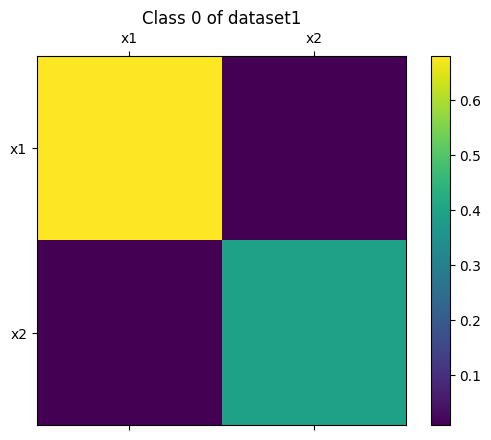

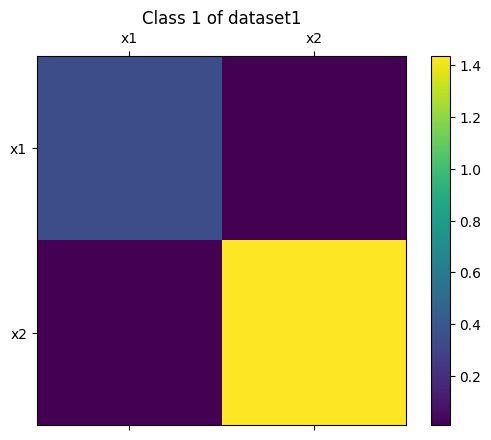

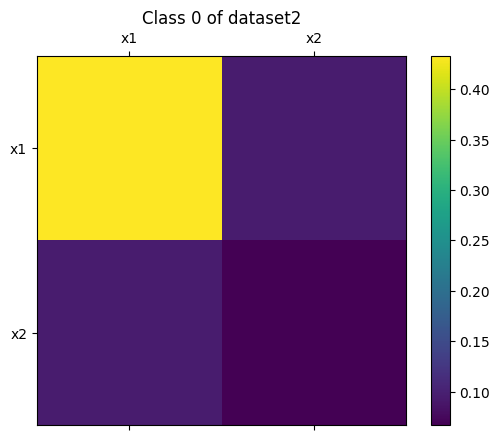

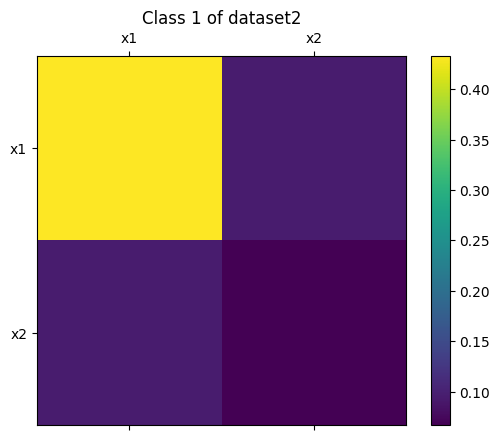

In [81]:
#PART A: Examine training sets here. plots etc.
#Hint: df1_class0 = df1[df1['column_name']==0] creates a new dataframe and includes samples (rows) whose class values are 0
#hint: for data distribution plots use plt.scatter(x-axis,y-axis,other params. check online)
#Hint: for each new plot use plt.figure() so they won't overlap, one on top of another
#-------
#to plot cov. matrices you may use following code: (compute 'cov_mtrx' by yourself)

alpha = ['x1', 'x2']
df1_data = df1.values[:,1:3] # x1,x2 values of dataset1
df2_data = df2.values[:,1:3] # x1,x2 values of dataset2

#dataset 1
df1_1 = df1_data[df1.values[:,3]==1] # x values for class 1
df1_0 = df1_data[df1.values[:,3]==0] # x values for class 0

#dataset 2
df2_1 = df2_data[df2.values[:,3]==1] # x values for class 1
df2_0 = df2_data[df2.values[:,3]==0] # x values for class 0

#Covariance matrices
cov1_0 = np.cov(df1_0.T)
cov1_1 = np.cov(df1_1.T)
cov2_0 = np.cov(df2_0.T)
cov2_1 = np.cov(df2_1.T)


# Plots of covariance matrices of dataset1
fig1_0 = plt.figure()
ax1_0 = fig1_0.add_subplot(111)
cax = ax1_0.matshow(cov1_0,interpolation='nearest') #cov. matrix of class0
fig1_0.colorbar(cax)
ax1_0.set_xticks((0,1))
ax1_0.set_xticklabels(alpha)
ax1_0.set_yticks((0,1))
ax1_0.set_yticklabels(alpha)

fig1_1 = plt.figure()
ax1_1 = fig1_1.add_subplot(111)
cax2 = ax1_1.matshow(cov1_1,interpolation='nearest') #cov. matrix of class1
fig1_1.colorbar(cax2)
ax1_1.set_xticks((0,1))
ax1_1.set_xticklabels(alpha)
ax1_1.set_yticks((0,1))
ax1_1.set_yticklabels(alpha)

ax1_0.title.set_text('Class 0 of dataset1')
ax1_1.title.set_text('Class 1 of dataset1')


# Plots of covariance matrices of dataset2
fig2_0 = plt.figure()
ax2_0 = fig2_0.add_subplot(111)
cax = ax2_0.matshow(cov2_0,interpolation='nearest') #cov. matrix of class0
fig2_0.colorbar(cax)
ax2_0.set_xticks((0,1))
ax2_0.set_xticklabels(alpha)
ax2_0.set_yticks((0,1))
ax2_0.set_yticklabels(alpha)

fig2_1 = plt.figure()
ax2_1 = fig2_1.add_subplot(111)
cax2 = ax2_1.matshow(cov2_1,interpolation='nearest') #cov. matrix of class1
fig2_1.colorbar(cax2)
ax2_1.set_xticks((0,1))
ax2_1.set_xticklabels(alpha)
ax2_1.set_yticks((0,1))
ax2_1.set_yticklabels(alpha)

ax2_0.title.set_text('Class 0 of dataset2')
ax2_1.title.set_text('Class 1 of dataset2')
#---------
#for the histogram plots use plt.hist() (Remember: 4 of them we want)
#for title use: plt.gca().set(title='Data distribution of feature x of trainingSet y', ylabel='Frequency')


#### From the color bar right of the graphs, it can be understand that the features pointed yellow has bigger variance. 
#### The dark purples has more little interval in class.


## Histograms

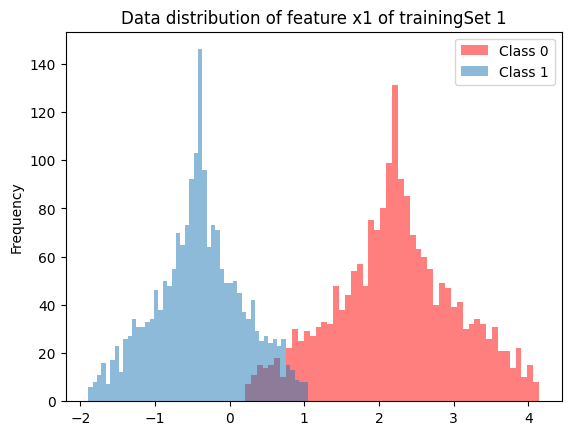

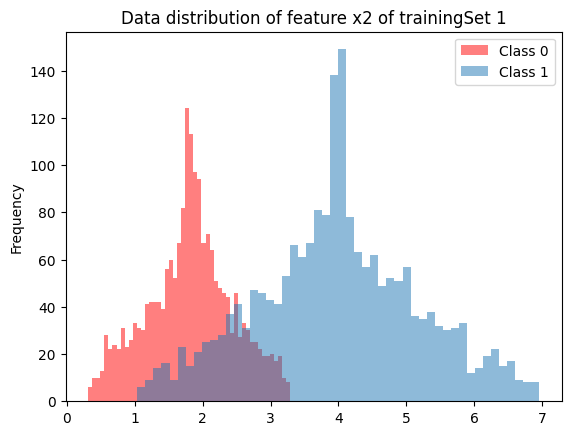

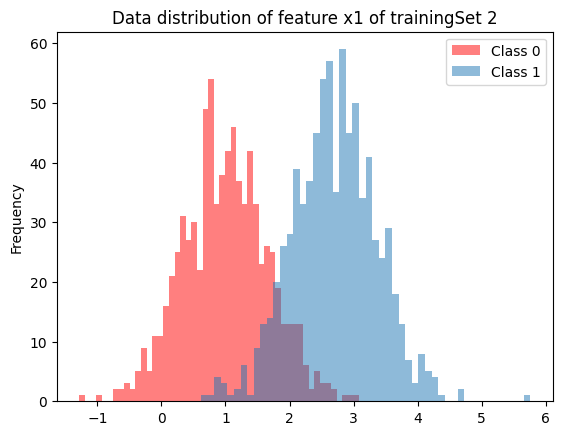

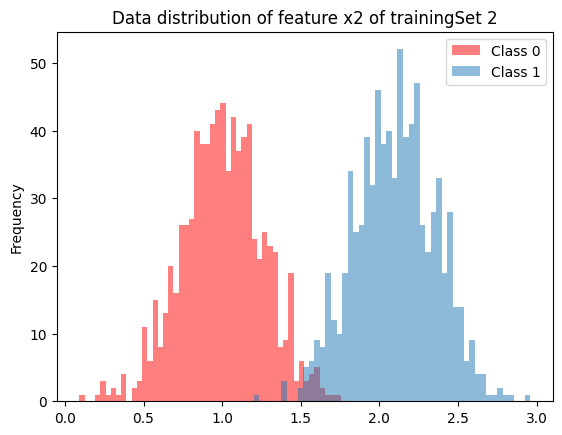

In [82]:

plt.hist(df1_0[:,0],bins=50,alpha=0.5,color='red')
plt.hist(df1_1[:,0],bins=50,alpha=0.5)

plt.legend(["Class 0","Class 1"])
plt.gca().set(title='Data distribution of feature x1 of trainingSet 1', ylabel='Frequency')
plt.show()

plt.hist(df1_0[:,1],bins=50,alpha=0.5,color='red')
plt.hist(df1_1[:,1],bins=50,alpha=0.5)

plt.legend(["Class 0","Class 1"])
plt.gca().set(title='Data distribution of feature x2 of trainingSet 1', ylabel='Frequency')
plt.show()

plt.hist(df2_0[:,0],bins=50,alpha=0.5,color='red')
plt.hist(df2_1[:,0],bins=50,alpha=0.5)

plt.legend(["Class 0","Class 1"])
plt.gca().set(title='Data distribution of feature x1 of trainingSet 2', ylabel='Frequency')
plt.show()

plt.hist(df2_0[:,1],bins=50,alpha=0.5,color='red')
plt.hist(df2_1[:,1],bins=50,alpha=0.5)

plt.legend(["Class 0","Class 1"])
plt.gca().set(title='Data distribution of feature x2 of trainingSet 2', ylabel='Frequency')
plt.show()

##### In first dataset x1 has little intersection area.
##### In the second dataset x2 has little intersection area.
##### So they are more selective to decide the class of a sample.

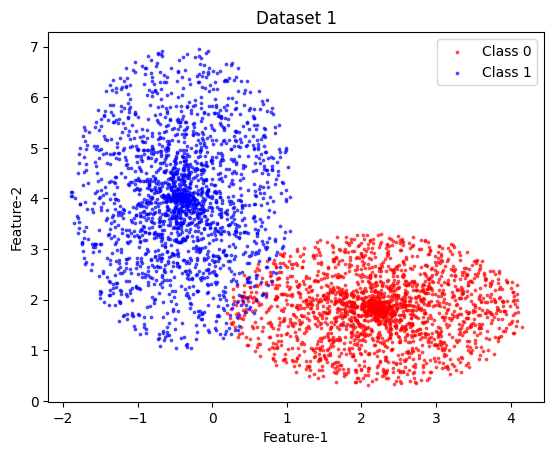

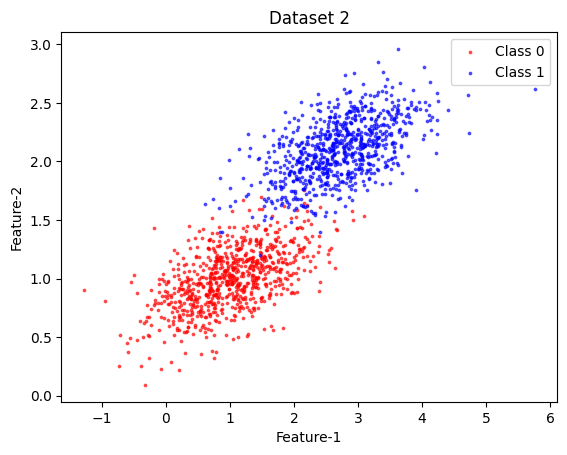

In [83]:
plt.scatter(df1_0[:,0],df1_0[:,1],s=3,c='red',alpha=0.6)
plt.scatter(df1_1[:,0],df1_1[:,1],s=3,c='blue',alpha=0.6)

plt.title("Dataset 1")
plt.legend(["Class 0","Class 1"])
plt.xlabel("Feature-1")
plt.ylabel("Feature-2")
plt.show()

plt.scatter(df2_0[:,0],df2_0[:,1],s=3,c='red',alpha=0.6)
plt.scatter(df2_1[:,0],df2_1[:,1],s=3,c='blue',alpha=0.6)

plt.title("Dataset 2")
plt.legend(["Class 0","Class 1"])
plt.xlabel("Feature-1")
plt.ylabel("Feature-2")

plt.show()

## PART B

In [84]:
#Implement PART B:
test1 = pd.read_csv("test1.csv")
test2 = pd.read_csv("test2.csv")
test1_samples = test1.values[:,1:3]
test1_labels = test1.values[:,3]
test2_samples = test2.values[:,1:3]
test2_labels = test2.values[:,3]

#Means
mean1_0 = np.mean(df1_0,axis=0)
mean1_1 = np.mean(df1_1,axis=0)
mean2_0 = np.mean(df2_0,axis=0)
mean2_1 = np.mean(df2_1,axis=0)
print("Means")
print("Class 0 of df1:\n",mean1_0)
print("Class 1 of df1:\n",mean1_1)
print("Class 0 of df2:\n",mean2_0)
print("Class 1 of df2:\n",mean2_1)
print()

#Covariance Matrices
print("Covariance Matrices")
print("Class 0 of df1:\n",cov1_0)
print("Class 1 of df1:\n",cov1_1)
print("Class 0 of df2:\n",cov2_0)
print("Class 1 of df2:\n",cov2_1)

def is_equal(cov1,cov2):
    cov = cov1 - cov2
    cov *= 1000
    cov = np.int32(cov)
    
    #check if the subtraction of 2 matrices is equal to 0 matrix
    if np.array_equal(cov,np.zeros((2,2))): 
        return 1
    else:
        return 0

# Probabilities of each classes in their dataframe
prob1_0 = df1_0.shape[0]/df1_data.shape[0]
prob1_1 = df1_1.shape[0]/df1_data.shape[0]
prob2_0 = df2_0.shape[0]/df2_data.shape[0]
prob2_1 = df2_1.shape[0]/df2_data.shape[0]

def trainBayes(test_samples,cov0,cov1,mean0,mean1,prob0,prob1):
    # Class arrays to keep the output of g(x) function for each classes and data.
    class0 = []
    class1 = []
    dterm0 = 0
    dterm1 = 0

    # if covariances of 2 classes not equal add the additinal term in general case
    if not is_equal(cov0,cov1):
        dterm0 = - 1/2*np.log(np.linalg.det(cov0))
        dterm1 = - 1/2*np.log(np.linalg.det(cov1))

    # Apply the LDA formula for each sample.
    for x in test_samples:
        g_0 = -1/2 * ((x.reshape(2,1) - mean0.reshape(2,1)).T @ np.linalg.inv(cov0).T @ (x.reshape(2,1) - mean0.reshape(2,1))) + np.log(prob0) + dterm0
        g_1 = -1/2 * ((x.reshape(2,1) - mean1.reshape(2,1)).T @ np.linalg.inv(cov1).T @ (x.reshape(2,1) - mean1.reshape(2,1))) + np.log(prob1) + dterm1
        class0.append(g_0.item())
        class1.append(g_1.item())
    return class0, class1

class1_0, class1_1 = trainBayes(test1_samples,cov1_0,cov1_1,mean1_0,mean1_1,prob1_0,prob1_1)
class2_0, class2_1 = trainBayes(test2_samples,cov2_0,cov2_1,mean2_0,mean2_1,prob2_0,prob2_1)

# Compare the scores of data for each class and label it. Then test with the original labels.
def error(class0,class1,test_labels):
    true = 0
    false = 0
    for i in range(0,len(class0)):
        if class0[i] > class1[i]:
            if test_labels[i] == 0:
                true += 1
            else:
                false +=1
        else:
            if test_labels[i] == 1:
                true += 1
            else:
                false +=1
    return 100*false/(true+false)

print()
print("Error of data1:")
print(error(class1_0,class1_1,test1_labels))
print("Error of data2:")
print(error(class2_0,class2_1,test2_labels))



Means
Class 0 of df1:
 [2.21769596 1.81682192]
Class 1 of df1:
 [-0.40657297  3.97311422]
Class 0 of df2:
 [1. 1.]
Class 1 of df2:
 [2.7 2.1]

Covariance Matrices
Class 0 of df1:
 [[0.68091842 0.0081905 ]
 [0.0081905  0.39290762]]
Class 1 of df1:
 [[0.35380673 0.00907201]
 [0.00907201 1.43810939]]
Class 0 of df2:
 [[0.43328013 0.09444427]
 [0.09444427 0.06674601]]
Class 1 of df2:
 [[0.43333327 0.09428412]
 [0.09428412 0.06666807]]

Error of data1:
1.2
Error of data2:
2.0


## PART C 

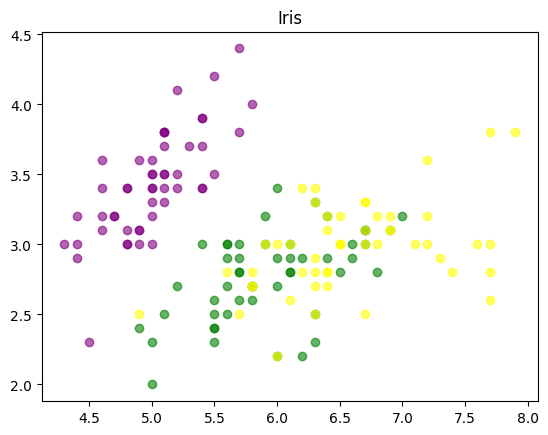

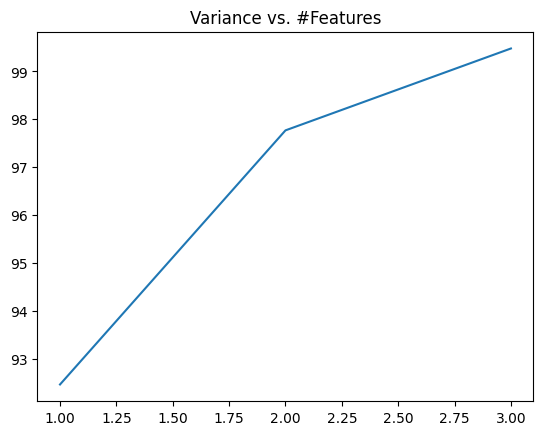

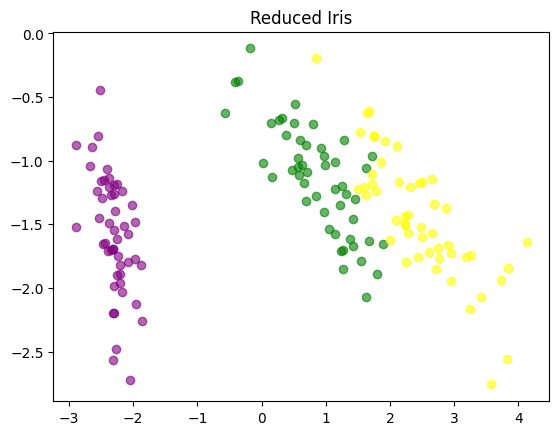

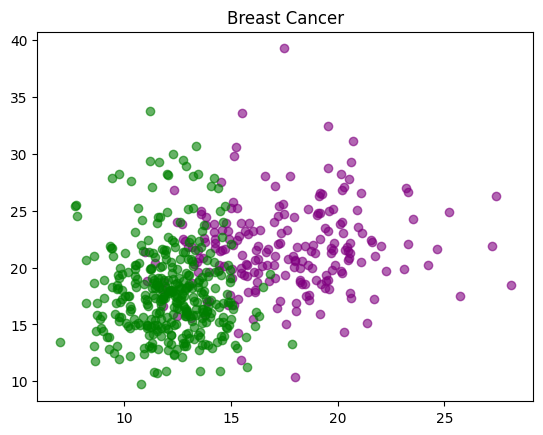

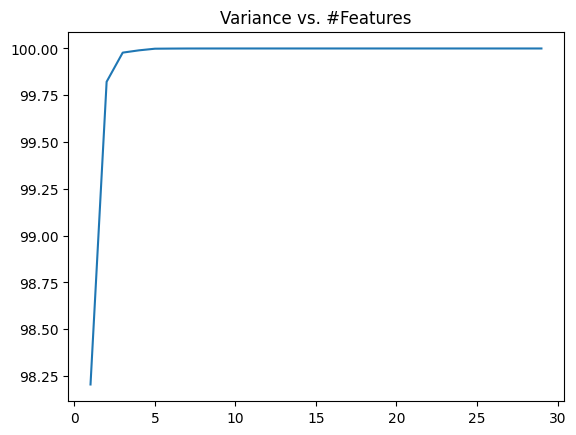

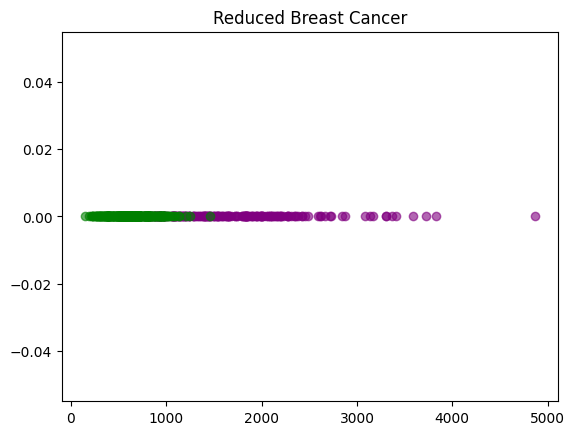

In [85]:
#Implement PART C:

from sklearn import datasets

def PCA(X, k=None, varRetained = 0.95, show = False):
    x = X.data
    
    # Calculate the necessary variables.
    mean = np.mean(x)
    cov = np.cov(x.T)
    eig_vals, eig_vecs = np.linalg.eig(cov)

    # This loop is necessary for both k=None and show=True cases.
    if k==None or show:
        k_e = 1 # This is a variable to keep the k value according to given varRetained value.
        pervar = []

        # Calculate the variance retained value for each k value.
        for i in range(1,eig_vals.shape[0]):
            sum_of_choosen = np.sum(eig_vals[:i])
            sum_of_all = np.sum(eig_vals)
            vretained = sum_of_choosen/sum_of_all
            pervar.append(vretained*100)
            if vretained < varRetained:
                k_e += 1
    if show:
        plt.title("Variance vs. #Features")
        plt.plot(range(1,eig_vals.shape[0],1),pervar)
        plt.show()
    if k ==None:
        k = k_e

    # Choose the top k vector
    topvecs = eig_vecs[:,:k]

    # Reduce features to k dimension
    reducedX = (x-mean) @ topvecs 
    
    return reducedX

def plot_data(X,y):
    if X.shape[1] == 1:
        zeros = np.zeros((X.shape[0],1))
        X = np.concatenate((X,zeros),axis=1)
    x1 = X[y==0]
    x2 = X[y==1]
    x3 = X[y==2]

    plt.scatter(x1[:, 0], x1[:, 1],c='purple',alpha=0.6)
    plt.scatter(x2[:, 0], x2[:, 1],c='green',alpha=0.6)
    plt.scatter(x3[:, 0], x3[:, 1],c='yellow',alpha=0.6)
    plt.show()

iris = datasets.load_iris()
plt.title("Iris")
plot_data(iris.data,iris.target)

reduced_iris = PCA(iris,show=True)
plt.title("Reduced Iris")
plot_data(reduced_iris,iris.target)

cancer = datasets.load_breast_cancer()
plt.title("Breast Cancer")
plot_data(cancer.data,cancer.target)

reduced_breat_cancer = PCA(cancer,show=True)
plt.title("Reduced Breast Cancer")
plot_data(reduced_breat_cancer,cancer.target)


#### They became more easy to seperate with a linear line with dimentionally reduction.
#### Actually it is an projection method to visualize the data clearly with most effective features.